In [537]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from statsmodels.api import Logit
from statsmodels.formula.api import logit
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

### Configuration
Configure the notebooks to make a better look and feel which assists to do the analysis in easy ways.

In [538]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
pd.set_option('display.max_columns', 100)

In [539]:
df = pd.read_excel("data.xlsx", index_col='Serial_no')
df = df.loc[:, df.columns != 'Q_1']
df = df.drop(columns=['Q_14', 'Q_15'])
df.head(3)

,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Drop_out,Q_8,Q_9,Q_10,Q_11,Q_12,Q_13,Q_16,Q_17,Q_18,Q_19,Q_20,Q_21,Q_22,Q_23,Q_24,Q_25,Q_26,Q_27,Q_28,Q_29,Q_30,Q_31,Q_32,Q_33,Q_34,Q_35_i,Q_35_ii,Q_35_iii,Q_35_iv,Q_35_v,Q_35_vi,Q_36,Q_37_i,Q_37_ii,Q_37_iii,Q_37_iv,Q_37_v,Q_37_vi,Q_37_vii,Q_37_viii,Q_37_ix,Q_37_x,Q_37_xi,Q_37_xii,Q_37_xiii,Q_37_xiv,Q_37_xv
Serial_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Female,27,8,150000,Seniors,Dead,Yes,Primary,Less,Bad,Rural,No,Average,No,Neutral,7,6,No,Yes,No,No,No,No,Yes,Rural,Near,Good,No,Public,Not_much,Good,Neutral,Yes,No,No,No,No,No,Yes,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_agree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_agree
2,Female,26,10,115000,Dead,Dead,Yes,Primary,Very_much,Good,Rural,No,Average,Yes,Supportive,8,7,No,No,No,No,Yes,Yes,No,Rural,Far,Good,No,Public,Not_much,Good,Yes,No,No,No,No,No,Yes,Yes,Strongly_disagree,Strongly_disagree,Strongly_disagree,Neutral,Disagree,Disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Disagree,Disagree,Disagree,Strongly_agree,Strongly_agree,Agree
3,Female,26,6,120000,Seniors,Adults,Yes,Primary,Very_much,Good,Urban,No,Average,No,Neutral,4,4,No,Yes,No,No,Yes,Yes,Yes,Urban,Near,Good,No,Private,Very_much,Good,Yes,No,No,No,No,No,Yes,Yes,Strongly_disagree,Strongly_disagree,Disagree,Disagree,Disagree,Strongly_disagree,Disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_agree,Strongly_agree,Neutral


In [540]:
categorical_d = ['Q_2', 'Q_7', 'Q_8', 'Q_9', 'Q_10', 'Q_11', 'Q_12', 'Q_13', 'Q_16', 'Q_17', 'Q_20', 'Q_21', 'Q_22', 'Q_23', 'Q_24', 'Q_25', 'Q_26', 'Q_27', 'Q_28', 'Q_29', 'Q_30', 'Q_31', 'Q_32', 'Q_33', 'Q_34', 'Q_35_i', 'Q_35_ii', 'Q_35_iii', 'Q_35_iv', 'Q_35_v', 'Q_35_vi', 'Q_36', 'Q_37_i', 'Q_37_ii', 'Q_37_iii', 'Q_37_iv', 'Q_37_v', 'Q_37_vi', 'Q_37_vii', 'Q_37_viii', 'Q_37_ix', 'Q_37_x', 'Q_37_xi', 'Q_37_xii', 'Q_37_xiii', 'Q_37_xiv', 'Q_37_xv']

numerical_d = ['Q_3', 'Q_4', 'Q_5', 'Q_18', 'Q_19']

df[categorical_d].head(2)

,Q_2,Q_7,Q_8,Q_9,Q_10,Q_11,Q_12,Q_13,Q_16,Q_17,Q_20,Q_21,Q_22,Q_23,Q_24,Q_25,Q_26,Q_27,Q_28,Q_29,Q_30,Q_31,Q_32,Q_33,Q_34,Q_35_i,Q_35_ii,Q_35_iii,Q_35_iv,Q_35_v,Q_35_vi,Q_36,Q_37_i,Q_37_ii,Q_37_iii,Q_37_iv,Q_37_v,Q_37_vi,Q_37_vii,Q_37_viii,Q_37_ix,Q_37_x,Q_37_xi,Q_37_xii,Q_37_xiii,Q_37_xiv,Q_37_xv
Serial_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Female,Dead,Primary,Less,Bad,Rural,No,Average,No,Neutral,No,Yes,No,No,No,No,Yes,Rural,Near,Good,No,Public,Not_much,Good,Neutral,Yes,No,No,No,No,No,Yes,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_agree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_agree
2,Female,Dead,Primary,Very_much,Good,Rural,No,Average,Yes,Supportive,No,No,No,No,Yes,Yes,No,Rural,Far,Good,No,Public,Not_much,Good,Yes,No,No,No,No,No,Yes,Yes,Strongly_disagree,Strongly_disagree,Strongly_disagree,Neutral,Disagree,Disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Disagree,Disagree,Disagree,Strongly_agree,Strongly_agree,Agree


In [541]:
# for i in categorical_d:
#     print(pd.crosstab(index=df[i], columns=df['Drop_out']))
#     print("------------------")

In [542]:
# fig = plt.figure(figsize=(32, 90))
# k = 1
# for i in categorical_d:
#     plt.subplot(13, 4, k)
#     crs = pd.crosstab(index=df['Drop_out'], columns=df[i])
#     # sns.barplot(crs)
#     sns.heatmap(crs)
#     k += 1

# plt.show()

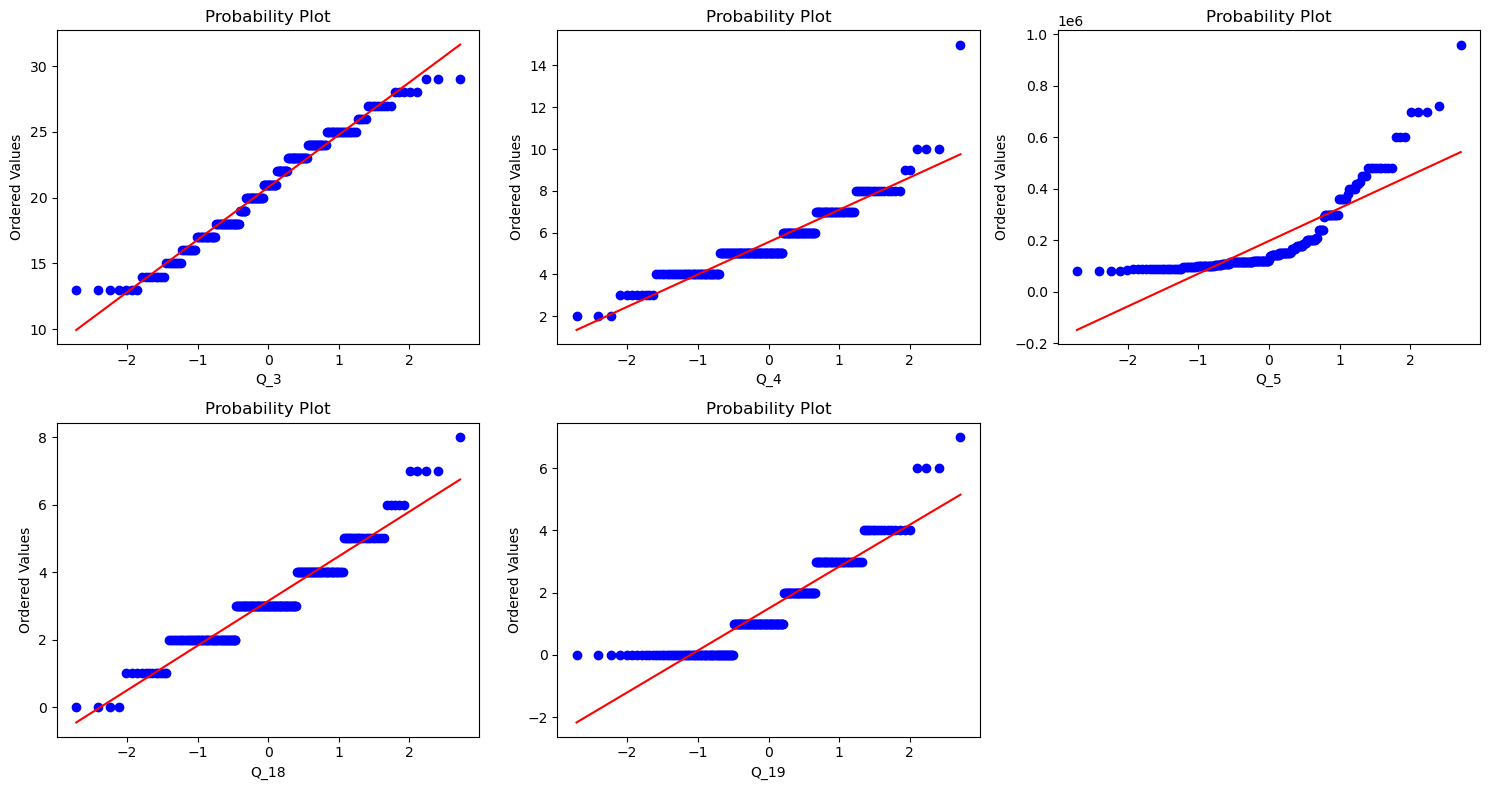

In [543]:
fig = plt.figure(figsize=(15, 8))
k = 1
for i in numerical_d:
    plt.subplot(2, 3, k)
    # sns.distplot(df[i], hist=False, kde=True)
    pc = stats.probplot(df[i],dist='norm',plot=plt)
    plt.xlabel(i)
    k += 1

plt.tight_layout()
plt.show()

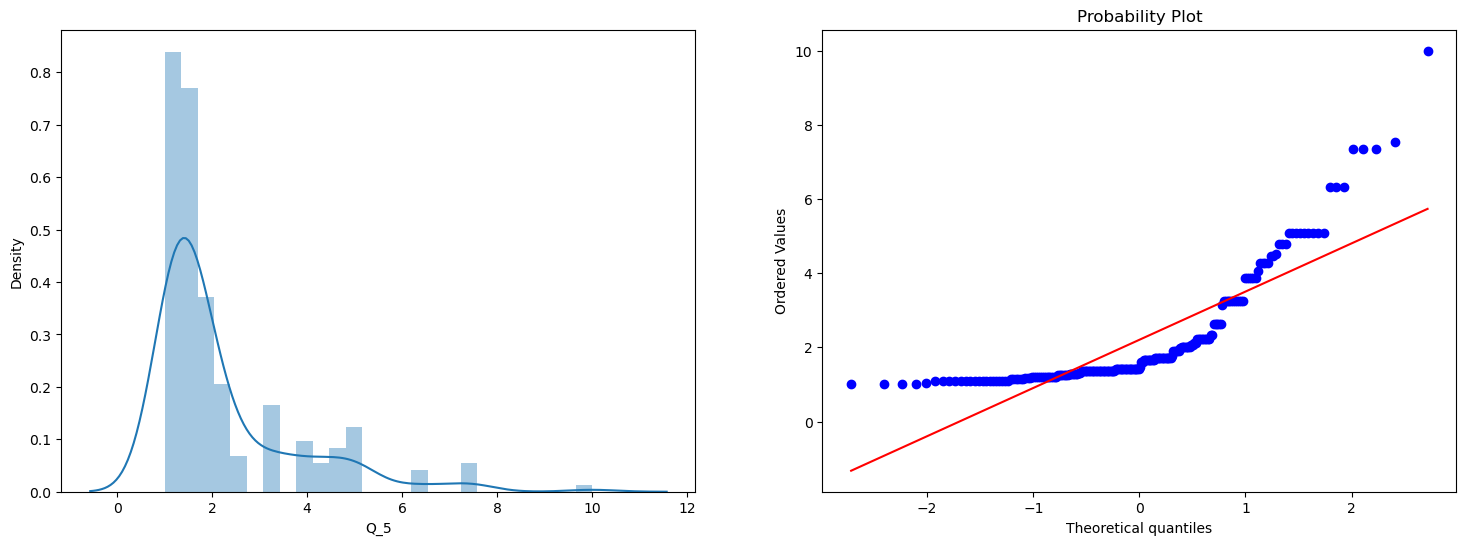

In [544]:
sc = MinMaxScaler(feature_range=(1,10))

df['Q_5'] = sc.fit_transform(df[['Q_5']])
fig , g = plt.subplots(1,2, figsize=(18,6))
# Histogram
g1 = sns.distplot(df['Q_5'], ax=g[0]);
# QQPlot
g2 = stats.probplot(df['Q_5'], dist='norm', plot=plt);

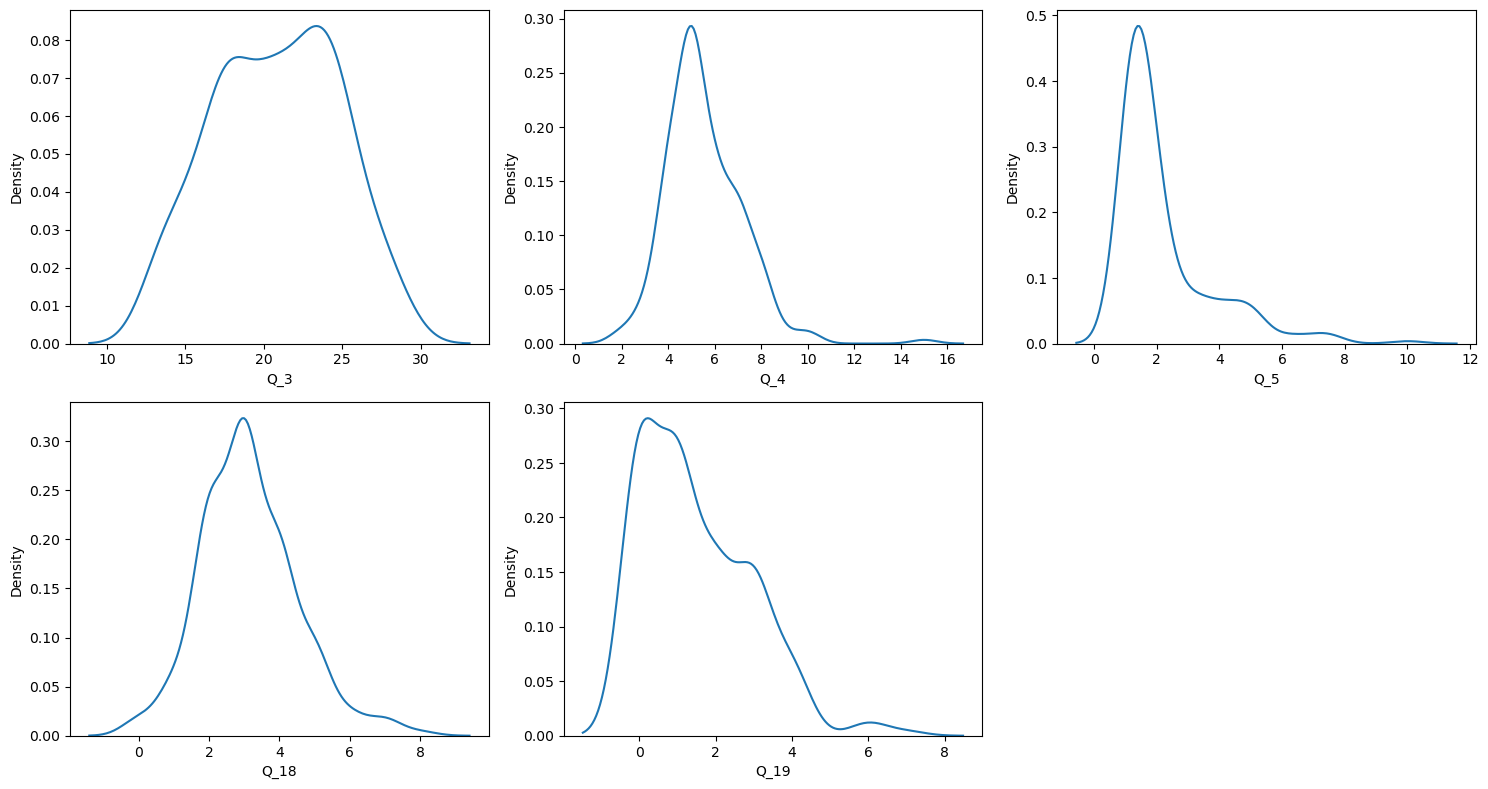

In [545]:
fig = plt.figure(figsize=(15, 8))
k = 1
for i in numerical_d:
    plt.subplot(2, 3, k)
    sns.distplot(df[i], hist=False, kde=True)
    # pc = stats.probplot(df[i],dist='norm',plot=plt)
    plt.xlabel(i)
    k += 1

plt.tight_layout()
plt.show()

In [546]:
df = pd.get_dummies(df, columns=['Drop_out'], drop_first=True)
df.head(3)

,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8,Q_9,Q_10,Q_11,Q_12,Q_13,Q_16,Q_17,Q_18,Q_19,Q_20,Q_21,Q_22,Q_23,Q_24,Q_25,Q_26,Q_27,Q_28,Q_29,Q_30,Q_31,Q_32,Q_33,Q_34,Q_35_i,Q_35_ii,Q_35_iii,Q_35_iv,Q_35_v,Q_35_vi,Q_36,Q_37_i,Q_37_ii,Q_37_iii,Q_37_iv,Q_37_v,Q_37_vi,Q_37_vii,Q_37_viii,Q_37_ix,Q_37_x,Q_37_xi,Q_37_xii,Q_37_xiii,Q_37_xiv,Q_37_xv,Drop_out_Yes
Serial_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Female,27,8,1.715909,Seniors,Dead,Primary,Less,Bad,Rural,No,Average,No,Neutral,7,6,No,Yes,No,No,No,No,Yes,Rural,Near,Good,No,Public,Not_much,Good,Neutral,Yes,No,No,No,No,No,Yes,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_agree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_agree,1
2,Female,26,10,1.357955,Dead,Dead,Primary,Very_much,Good,Rural,No,Average,Yes,Supportive,8,7,No,No,No,No,Yes,Yes,No,Rural,Far,Good,No,Public,Not_much,Good,Yes,No,No,No,No,No,Yes,Yes,Strongly_disagree,Strongly_disagree,Strongly_disagree,Neutral,Disagree,Disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Disagree,Disagree,Disagree,Strongly_agree,Strongly_agree,Agree,1
3,Female,26,6,1.409091,Seniors,Adults,Primary,Very_much,Good,Urban,No,Average,No,Neutral,4,4,No,Yes,No,No,Yes,Yes,Yes,Urban,Near,Good,No,Private,Very_much,Good,Yes,No,No,No,No,No,Yes,Yes,Strongly_disagree,Strongly_disagree,Disagree,Disagree,Disagree,Strongly_disagree,Disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_agree,Strongly_agree,Neutral,1


In [547]:
lg = logit(formula="Drop_out_Yes ~ Q_3 + Q_4 + Q_5 + Q_18 + Q_19", data=df).fit()
lg.summary2()

Optimization terminated successfully.
         Current function value: 0.402113
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.354     
Dependent Variable: Drop_out_Yes     AIC:              180.8873  
Date:               2022-12-30 03:24 BIC:              200.9700  
No. Observations:   210              Log-Likelihood:   -84.444   
Df Model:           5                LL-Null:          -130.72   
Df Residuals:       204              LLR p-value:      1.9494e-18
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Intercept     -3.1426    1.3368  -2.3508  0.0187  -5.7627  -0.5225
Q_3            0.2157    0.0587   3.6755  0.0002   0.1007   0.3307
Q_4            0.3365    0.2186   1.5392  0.1238  -0.0920   0.7649
Q_5           -0.7415    0.1665  -4.4524  0.0000  -1.0680  -0.4151
Q_18          -0.5445    0.2551  -2.1340  0.0328  -1.0445  -0.0444
Q_19           0.9169    0.1997   4.5913  0.0000   0.5255   1.3084
=================================================================

"""

In [548]:
sig_factors = []

for i in categorical_d:
    crs = pd.crosstab(index=df['Drop_out_Yes'], columns=df[i])
    stat, p, dof = stats.chi2_contingency(crs.values)[0:3]
    if p<0.05:
        sig_factors.append(i)

In [549]:
X = df[sig_factors]
y = df['Drop_out_Yes']
X.head(3)

,Q_8,Q_9,Q_10,Q_11,Q_12,Q_13,Q_16,Q_17,Q_21,Q_23,Q_24,Q_27,Q_29,Q_31,Q_34,Q_35_ii,Q_35_iii,Q_35_iv,Q_35_vi,Q_36,Q_37_iii,Q_37_iv,Q_37_vi,Q_37_vii,Q_37_xiii,Q_37_xiv,Q_37_xv
Serial_no,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,Primary,Less,Bad,Rural,No,Average,No,Neutral,Yes,No,No,Rural,Good,Public,Neutral,No,No,No,No,Yes,Strongly_disagree,Strongly_agree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_disagree,Strongly_agree
2,Primary,Very_much,Good,Rural,No,Average,Yes,Supportive,No,No,Yes,Rural,Good,Public,Yes,No,No,No,Yes,Yes,Strongly_disagree,Neutral,Disagree,Strongly_disagree,Strongly_agree,Strongly_agree,Agree
3,Primary,Very_much,Good,Urban,No,Average,No,Neutral,Yes,No,Yes,Urban,Good,Private,Yes,No,No,No,Yes,Yes,Disagree,Disagree,Strongly_disagree,Disagree,Strongly_agree,Strongly_agree,Neutral


In [550]:
X = pd.get_dummies(X, columns=sig_factors, drop_first=True)
X.head(3)

,Q_8_Primary,Q_8_Secondary,Q_9_Neutral,Q_9_Very_much,Q_10_Bad,Q_10_Good,Q_11_Urban,Q_12_Not_Applicable,Q_12_Yes,Q_13_Bad,Q_13_Good,Q_16_Yes,Q_17_No_Support,Q_17_Supportive,Q_21_Yes,Q_23_Yes,Q_24_Yes,Q_27_Urban,Q_29_Good,Q_29_Neutral,Q_31_Public,Q_34_No,Q_34_Yes,Q_35_ii_Yes,Q_35_iii_Yes,Q_35_iv_Yes,Q_35_vi_Yes,Q_36_Yes,Q_37_iii_Disagree,Q_37_iii_Neutral,Q_37_iii_Strongly_agree,Q_37_iii_Strongly_disagree,Q_37_iv_Disagree,Q_37_iv_Neutral,Q_37_iv_Strongly_agree,Q_37_iv_Strongly_disagree,Q_37_vi_Disagree,Q_37_vi_Neutral,Q_37_vi_Strongly_agree,Q_37_vi_Strongly_disagree,Q_37_vii_Disagree,Q_37_vii_Neutral,Q_37_vii_Strongly_agree,Q_37_vii_Strongly_disagree,Q_37_xiii_Disagree,Q_37_xiii_Neutral,Q_37_xiii_Strongly_agree,Q_37_xiii_Strongly_disagree,Q_37_xiv_Disagree,Q_37_xiv_Neutral,Q_37_xiv_Strongly_agree,Q_37_xiv_Strongly_disagree,Q_37_xv_Disagree,Q_37_xv_Neutral,Q_37_xv_Strongly_agree,Q_37_xv_Strongly_disagree
Serial_no,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0
2,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
3,1,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0


In [551]:
X = X.drop(X.columns[28:], axis=1)
X = X.drop(X.columns[22:27], axis=1)
X = X.drop(columns=['Q_12_Not_Applicable'], axis=1)
X.head(3)

,Q_8_Primary,Q_8_Secondary,Q_9_Neutral,Q_9_Very_much,Q_10_Bad,Q_10_Good,Q_11_Urban,Q_12_Yes,Q_13_Bad,Q_13_Good,Q_16_Yes,Q_17_No_Support,Q_17_Supportive,Q_21_Yes,Q_23_Yes,Q_24_Yes,Q_27_Urban,Q_29_Good,Q_29_Neutral,Q_31_Public,Q_34_No,Q_36_Yes
Serial_no,,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1
2,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1
3,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,1,0,0,0,1


In [552]:
data = X.copy()
data["Drop_out_Yes"] = y
data.head(2)

,Q_8_Primary,Q_8_Secondary,Q_9_Neutral,Q_9_Very_much,Q_10_Bad,Q_10_Good,Q_11_Urban,Q_12_Yes,Q_13_Bad,Q_13_Good,Q_16_Yes,Q_17_No_Support,Q_17_Supportive,Q_21_Yes,Q_23_Yes,Q_24_Yes,Q_27_Urban,Q_29_Good,Q_29_Neutral,Q_31_Public,Q_34_No,Q_36_Yes,Drop_out_Yes
Serial_no,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1
2,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1


In [553]:
X.columns

Index(['Q_8_Primary', 'Q_8_Secondary', 'Q_9_Neutral', 'Q_9_Very_much',
       'Q_10_Bad', 'Q_10_Good', 'Q_11_Urban', 'Q_12_Yes', 'Q_13_Bad',
       'Q_13_Good', 'Q_16_Yes', 'Q_17_No_Support', 'Q_17_Supportive',
       'Q_21_Yes', 'Q_23_Yes', 'Q_24_Yes', 'Q_27_Urban', 'Q_29_Good',
       'Q_29_Neutral', 'Q_31_Public', 'Q_34_No', 'Q_36_Yes'],
      dtype='object')

In [555]:
fs = "Drop_out_Yes ~ "
for i in X.columns:
    fs = fs + " + " + i
    
print(fs)

Drop_out_Yes ~  + Q_8_Primary + Q_8_Secondary + Q_9_Neutral + Q_9_Very_much + Q_10_Bad + Q_10_Good + Q_11_Urban + Q_12_Yes + Q_13_Bad + Q_13_Good + Q_16_Yes + Q_17_No_Support + Q_17_Supportive + Q_21_Yes + Q_23_Yes + Q_24_Yes + Q_27_Urban + Q_29_Good + Q_29_Neutral + Q_31_Public + Q_34_No + Q_36_Yes


In [556]:
lgc = logit(formula=fs, data=data).fit()

         Current function value: 0.196559
         Iterations: 35


In [557]:
lgc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           Drop_out_Yes   No. Observations:                  210
Model:                          Logit   Df Residuals:                      187
Method:                           MLE   Df Model:                           22
Date:                Fri, 30 Dec 2022   Pseudo R-squ.:                  0.6842
Time:                        03:25:29   Log-Likelihood:                -41.277
converged:                      False   LL-Null:                       -130.72
Covariance Type:            nonrobust   LLR p-value:                 1.449e-26
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.5494      2.857      1.242      0.214      -2.051       9.150
Q_8_Primary         7.0366      1.911      3.682      0.000       3.291      10.782
Q_8_Secondary       6.0669      1.763      3.441      0.001       2.612       9.522
Q_9_Neutral        -2.3514      1.316     -1.787      0.074      -4.930       0.228
Q_9_Very_much       1.3914      1.275      1.091      0.275      -1.108       3.891
Q_10_Bad           -0.7343      1.550     -0.474      0.636      -3.773       2.304
Q_10_Good          -0.7570      0.907     -0.835      0.404      -2.534       1.020
Q_11_Urban         -1.3536      1.168     -1.158      0.247      -3.644       0.937
Q_12_Yes           24.7689   5613.075      0.004      0.996    -1.1e+04     1.1e+04
Q_13_Bad            1.4034      1.107      1.268      0.205      -0.766       3.573
Q_13_Good          -1.7411      0.848     -2.053      0.040      -3.403      -0.079
Q_16_Yes           -3.3824      0.952     -3.554      0.000      -5.247      -1.517
Q_17_No_Support     5.2651      1.709      3.081      0.002       1.916       8.614
Q_17_Supportive     0.3903      0.684      0.571      0.568      -0.951       1.731
Q_21_Yes           -1.3486      0.882     -1.530      0.126      -3.076       0.379
Q_23_Yes           -3.0839      0.868     -3.552      0.000      -4.786      -1.382
Q_24_Yes           -0.4584      0.759     -0.604      0.546      -1.945       1.029
Q_27_Urban         -1.8044      1.109     -1.627      0.104      -3.978       0.370
Q_29_Good          -3.0083      1.809     -1.663      0.096      -6.553       0.537
Q_29_Neutral       -1.9434      1.900     -1.023      0.306      -5.668       1.781
Q_31_Public        -2.1802      0.907     -2.405      0.016      -3.957      -0.403
Q_34_No             1.4372      0.903      1.591      0.112      -0.334       3.208
Q_36_Yes           -1.4010      0.796     -1.761      0.078      -2.960       0.158
===================================================================================

Possibly complete quasi-separation: A fraction 0.30 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [ ]:
# X = df.drop('Drop_out', axis=1)
# y = df['Drop_out']

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
# from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression(random_state = 0)
# classifier.fit(X_train, y_train)